In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("benchmark.csv")

data = data[data["BLAS"] == False]

grouped_data = data.groupby(["SINGLE", "THREADS"]).agg({"last_process": "mean", "last_eval": "mean"})

lowest_process_idx = grouped_data["last_process"].idxmin()
lowest_eval_idx = grouped_data["last_eval"].idxmin()
lowest_process_group = grouped_data.loc[lowest_process_idx]
lowest_eval_group = grouped_data.loc[lowest_eval_idx]

print("Group with the lowest average last_process:")
print(lowest_process_group)
print()
print("Group with the lowest average last_eval:")
print(lowest_eval_group)

Group with the lowest average last_process:
last_process    135.172414
last_eval       163.569499
Name: (False, 24), dtype: float64

Group with the lowest average last_eval:
last_process    135.185300
last_eval       159.829788
Name: (False, 20), dtype: float64


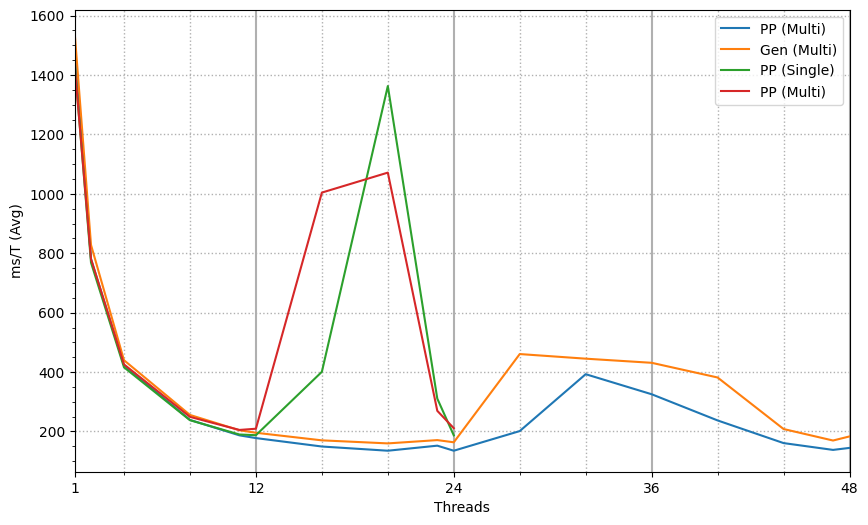

In [20]:
from matplotlib.ticker import MultipleLocator

# Separate the data for SINGLE=False and SINGLE=True
single_false_data = grouped_data.loc[False]
single_true_data = grouped_data.loc[True]

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the lines for SINGLE=False
plt.plot(single_false_data.index.get_level_values("THREADS"), single_false_data["last_process"], label="PP (Multi)")
plt.plot(single_false_data.index.get_level_values("THREADS"), single_false_data["last_eval"], label="Gen (Multi)")

# Plot the lines for SINGLE=True
plt.plot(single_true_data.index.get_level_values("THREADS"), single_true_data["last_process"], label="PP (Single)")
plt.plot(single_true_data.index.get_level_values("THREADS"), single_true_data["last_eval"], label="PP (Multi)")

# Set the y-axis label
plt.ylabel("ms/T (Avg)")

# Add a legend
plt.legend()

# Set the x-axis tick positions and labels
x_ticks = [1, 12, 24, 36, 48]  # Define the tick positions
plt.xticks(x_ticks)  # Set the tick positions
plt.xlabel('Threads')  # Set the x-axis label

# Add minor x-axis gridlines
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(MultipleLocator(4))
plt.gca().yaxis.set_major_locator(MultipleLocator(200))

# Add gridlines
#plt.grid(True, which='both', linestyle='--')  # Add gridlines
plt.grid(True, which='major', axis='x', linestyle='-', linewidth=1.5)  # Major gridlines
plt.grid(True, which='minor', axis='x', linestyle=':', linewidth=1)  # Minor gridlines
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=1)  # Major gridlines
plt.xlim(1,48)


# Show the plot
plt.show()